# COGS 108 - EDA Checkpoint

# Names

- Alan Apte
- Zihang Xu
- Carlos Martinez
- Lam Nghiem
- Rainee Pei

<a id='research_question'></a>
# Research Question

What affects the popularity of instant ramen brands/companies?*Fill in your research question here*

# Setup

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.probability import FreqDist
import string

from nltk.stem import PorterStemmer


# Data Cleaning

Describe your data cleaning steps here.

In [76]:
#import dataset
df = pd.read_csv('ramen ratings.csv')

#remove URL column
df = df[['ID', 'Brand', 'Variety', 'Style', 'Country', 'Stars']]

#make sure all ratings in 'Stars' column are numerical values (float64)
#drop rows without numerical rating in 'Stars' column
df = df[pd.to_numeric(df['Stars'], errors='coerce').notnull()]
df['Stars'] = df['Stars'].astype(float)

#replace flavour with flavor
#df['Variety'] = df['Variety'].str.replace('flavour','flavor', True)

def standardize_flavor(string):
    string = string.lower()
    string = string.strip()
    
    output = string.replace('flavour', 'flavor')
    
    return output

df['Variety'] = df['Variety'].apply(standardize_flavor)

#tokenize
df['Variety'] = df['Variety'].apply(word_tokenize) 
stop_words = stopwords.words('english')
newStopWords = ['(',')','-','_',':','&']
stop_words.extend(newStopWords)

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)

#stemming
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

df['Variety'] = df['Variety'].apply(lambda x: [ps.stem(y) for y in x])



#remove stop words
df['Variety'] = df['Variety'].apply(lambda x: [item for item in x if item not in stop_words])


# Data Analysis & Results (EDA)

Variety word freq.
Style vs Stars
Brand vs Stars
Country vs Stars

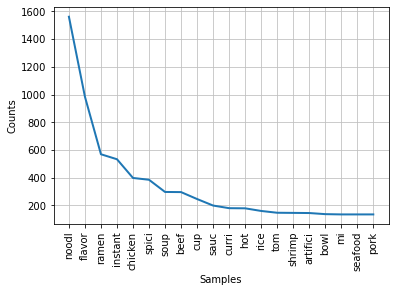

In [77]:
variety = df['Variety'].apply(pd.Series).stack()

# calculation word frequency
fdist_variety = FreqDist(variety)

# Frequency Distribution Plot - top 20
# for words in variety
fdist_variety.plot(20, cumulative=False);